In [2]:
from PIL import Image
import os, glob, numpy as np
from sklearn.model_selection import train_test_split

caltech_dir = "./dataset_2/train"

categories = ["김치찌개", "라면", "양념게장", "제육볶음","된장찌개",
             "돈까스","김치볶음밥","비빔밥","삼겹살","스파게티"]
nb_classes = len(categories)

image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = []
y = []

for idx, cat in enumerate(categories):
    
    #one-hot 돌리기.
    label = [0 for i in range(nb_classes)]
    label[idx] = 1

    image_dir = caltech_dir + "/" + cat
    files = glob.glob(image_dir+"/*.jpeg")
    print(cat, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X.append(data)
        y.append(label)

        if i % 700 == 0:
            print(cat, " : ", f)

X = np.array(X)
y = np.array(y)
#1 0 0 0 이면 airplanes
#0 1 0 0 이면 buddha 이런식


X_train, X_test, y_train, y_test = train_test_split(X, y)
xy = (X_train, X_test, y_train, y_test)
np.save("./upgrade_numpy_data/multi_image_data.npy", xy)

print("ok", len(y))

김치찌개  파일 길이 :  20
김치찌개  :  ./dataset_2/train/김치찌개/3 copy 3.jpeg
라면  파일 길이 :  20
라면  :  ./dataset_2/train/라면/3 copy 3.jpeg
양념게장  파일 길이 :  20
양념게장  :  ./dataset_2/train/양념게장/3 copy 3.jpeg
제육볶음  파일 길이 :  20
제육볶음  :  ./dataset_2/train/제육볶음/3 copy 3.jpeg
된장찌개  파일 길이 :  20
된장찌개  :  ./dataset_2/train/된장찌개/3 copy 3.jpeg
돈까스  파일 길이 :  20
돈까스  :  ./dataset_2/train/돈까스/3 copy 3.jpeg
김치볶음밥  파일 길이 :  20
김치볶음밥  :  ./dataset_2/train/김치볶음밥/3 copy 3.jpeg
비빔밥  파일 길이 :  20
비빔밥  :  ./dataset_2/train/비빔밥/3 copy 3.jpeg
삼겹살  파일 길이 :  20
삼겹살  :  ./dataset_2/train/삼겹살/3 copy 3.jpeg
스파게티  파일 길이 :  20
스파게티  :  ./dataset_2/train/스파게티/3 copy 3.jpeg
ok 200


In [3]:
import os, glob, numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K

import tensorflow as tf

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

X_train, X_test, y_train, y_test = np.load('./upgrade_numpy_data/multi_image_data.npy',allow_pickle=True)
print(X_train.shape)
print(X_train.shape[0])

(150, 64, 64, 3)
150


In [4]:
categories = ["김치찌개", "라면", "양념게장", "제육볶음","된장찌개",
             "돈까스","김치볶음밥","비빔밥","삼겹살","스파게티"]
nb_classes = len(categories)

#일반화
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255


In [5]:

    model = Sequential()
    model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './upgrade_model'
    
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    
    model_path = model_dir + '/upgrade_multi_img_classification.model'
    checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0

In [7]:
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stopping])

Epoch 1/50
5/5 [==============================] - 2s 314ms/step - loss: 2.7875 - accuracy: 0.0863 - val_loss: 2.3115 - val_accuracy: 0.2000

Epoch 00001: val_loss improved from inf to 2.31153, saving model to ./upgrade_model/upgrade_multi_img_classification.model
INFO:tensorflow:Assets written to: ./upgrade_model/upgrade_multi_img_classification.model/assets
Epoch 2/50
5/5 [==============================] - 1s 109ms/step - loss: 2.3042 - accuracy: 0.1445 - val_loss: 2.2711 - val_accuracy: 0.3600

Epoch 00002: val_loss improved from 2.31153 to 2.27113, saving model to ./upgrade_model/upgrade_multi_img_classification.model
INFO:tensorflow:Assets written to: ./upgrade_model/upgrade_multi_img_classification.model/assets
Epoch 3/50
5/5 [==============================] - 1s 127ms/step - loss: 2.2021 - accuracy: 0.2522 - val_loss: 2.2249 - val_accuracy: 0.4600

Epoch 00003: val_loss improved from 2.27113 to 2.22494, saving model to ./upgrade_model/upgrade_multi_img_classification.model
INFO:t


Epoch 00024: val_loss improved from 0.00242 to 0.00206, saving model to ./upgrade_model/upgrade_multi_img_classification.model
INFO:tensorflow:Assets written to: ./upgrade_model/upgrade_multi_img_classification.model/assets
Epoch 25/50
5/5 [==============================] - 1s 117ms/step - loss: 0.0141 - accuracy: 0.9947 - val_loss: 0.0024 - val_accuracy: 1.0000

Epoch 00025: val_loss did not improve from 0.00206
Epoch 26/50
5/5 [==============================] - 1s 126ms/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000

Epoch 00026: val_loss did not improve from 0.00206
Epoch 27/50
5/5 [==============================] - 1s 147ms/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000

Epoch 00027: val_loss improved from 0.00206 to 0.00152, saving model to ./upgrade_model/upgrade_multi_img_classification.model
INFO:tensorflow:Assets written to: ./upgrade_model/upgrade_multi_img_classification.model/assets
Epoch 28/50
5/5 [======

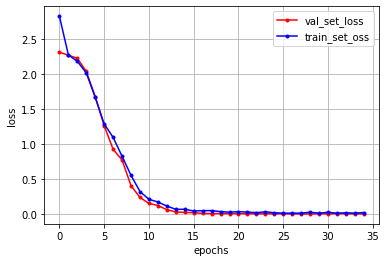

In [8]:

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

In [11]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model
model = load_model('./model/multi_img_classification.model')

In [1]:
from flask import Flask, request
import numpy as np
import os, glob, numpy as np
from tensorflow.keras.models import load_model
app = Flask(__name__)

@app.route('/', methods = ['GET', 'POST'])
def upload_file():
    if request.method == 'POST':
        X=[]
        f = request.files['image']
        #저장할 경로 + 파일명
        f.save(f.filename)
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w,image_h))
        data = np.asarray(img)
        X.append(data)
        X = np.array(X)
        model = load_model('./model/multi_img_classification.model')
        prediction = model.predict(X)
        np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
        pre_ans = prediction.argmax()

        print(pre_ans)
        pre_ans_str = ''
        if pre_ans == 0: pre_ans_str = "김치찌개"
        elif pre_ans == 1: pre_ans_str = "라면"
        elif pre_ans == 2: pre_ans_str = "양념게장"
        else: pre_ans_str = "제육볶음"
        if pre_ans[0] >= 0.8: print("이미지는 "+pre_ans_str+"로 추정됩니다.")
        if pre_ans[1] >= 0.8: print("이미지는 "+pre_ans_str+"으로 추정됩니다.")
        if pre_ans[2] >= 0.8: print("이미지는 "+pre_ans_str+"로 추정됩니다.")
        if pre_ans[3] >= 0.8: print("이미지는 "+pre_ans_str+"로 추정됩니다.")
        return pre_ans_str

if __name__ == '__main__':
    app.run(host="0.0.0.0", port=5000, debug=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://0.0.0.0:5000/ (Press CTRL+C to quit)
 * Restarting with fsevents reloader


SystemExit: 1

/Users/roopre/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3426: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [1]:
from tensorflow import keras
from flask import Flask, request
import numpy as np
import tensorflow as tf
app = Flask(__name__)

@app.route('/', methods = ['GET', 'POST'])
def upload_file():
    if request.method == 'POST':
        class_names = ['김치찌개','양념게장', '라면']
        model = keras.models.load_model('model.h5')
        f = request.files['image']
        #저장할 경로 + 파일명
        f.save(f.filename)
        img = keras.preprocessing.image.load_img(
            f.filename, target_size=(150, 150)
        )
        img_array = keras.preprocessing.image.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0) # Create a batch

        predictions = model.predict(img_array)
        score = tf.nn.softmax(predictions[0])

        return class_names[np.argmax(score)]

if __name__ == '__main__':
    app.run(host="0.0.0.0", port=5000, debug=True)


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://0.0.0.0:5000/ (Press CTRL+C to quit)
 * Restarting with fsevents reloader


SystemExit: 1

/Users/roopre/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3426: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
